# Cyberbullying Classification
---

# Imports
---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re
import nltk
from nltk.corpus import stopwords

# Loading the Dataset
---

In [3]:
df = pd.read_csv('../data/cyberbullying_tweets.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB


In [4]:
df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [5]:
df.tail()

,tweet_text,cyberbullying_type
47687,"Black ppl aren't expected to do anything, depe...",ethnicity
47688,Turner did not withhold his disappointment. Tu...,ethnicity
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity
47691,Bro. U gotta chill RT @CHILLShrammy: Dog FUCK ...,ethnicity


In [6]:
df.shape

(47692, 2)

# EDA
---

# 1. Handling Null Values

In [7]:
df.isna().any()

tweet_text            False
cyberbullying_type    False
dtype: bool

In [8]:
df.isna().sum()

tweet_text            0
cyberbullying_type    0
dtype: int64

# 2. Handling Duplicate Values

In [9]:
df.nunique()

tweet_text            46017
cyberbullying_type        6
dtype: int64

In [10]:
df['tweet_text'].nunique()

46017

# 3. Class Distributions

In [11]:
df['cyberbullying_type'].value_counts()

religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: cyberbullying_type, dtype: int64

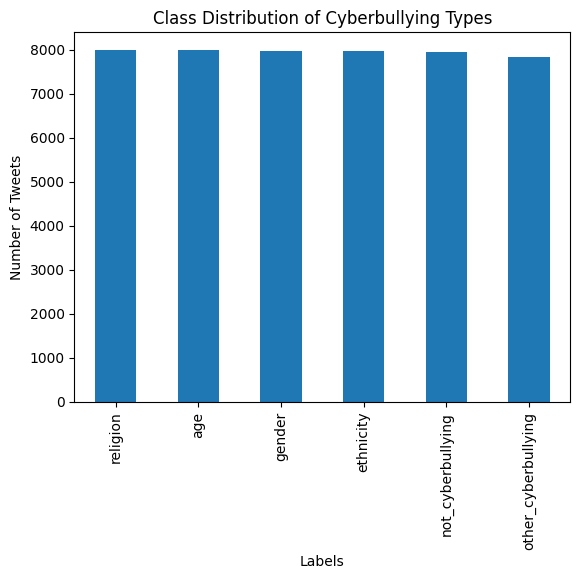

In [12]:
# Create a bar plot of the class distribution
class_counts = df['cyberbullying_type'].value_counts()
class_counts.plot(kind='bar')
plt.title('Class Distribution of Cyberbullying Types')
plt.xlabel('Labels')
plt.ylabel('Number of Tweets')
plt.show()

# 4. Word Count

In [14]:
# Concatenate all tweet texts into a single string
all_text = ' '.join(df['tweet_text'].values)
# Remove URLs, mentions, and hashtags from the text
all_text = re.sub(r'http\S+', '', all_text)
all_text = re.sub(r'@\S+', '', all_text)
all_text = re.sub(r'#\S+', '', all_text)
# Split the text into individual words
words = all_text.split()

In [15]:
# Remove stop words
stop_words = set(stopwords.words('english'))
words = [word for word in words if not word in stop_words]

In [16]:
# Count the frequency of each word
word_counts = Counter(words)
top_words = word_counts.most_common(100)
top_words

[('I', 16040),
 ('school', 6681),
 ('like', 5249),
 ('high', 4645),
 ('dumb', 4387),
 ('bullied', 4266),
 ('RT', 4196),
 ('people', 3792),
 ('u', 3241),
 ('rape', 3021),
 ('fuck', 3019),
 ('one', 2786),
 ('bully', 2725),
 ('gay', 2686),
 ('&amp;', 2599),
 ('The', 2523),
 ('get', 2504),
 ('You', 2477),
 ('nigger', 2441),
 ('ass', 2438),
 ('girls', 2379),
 ("I'm", 2324),
 ('girl', 2274),
 ('jokes', 2070),
 ('know', 2022),
 ('think', 1958),
 ('would', 1955),
 ('black', 1869),
 ('white', 1641),
 ('got', 1602),
 ('say', 1511),
 ('make', 1506),
 ('FUCK', 1497),
 ('call', 1480),
 ('even', 1441),
 ('Muslim', 1421),
 ('called', 1421),
 ('And', 1393),
 ('Muslims', 1386),
 ('-', 1372),
 ('never', 1333),
 ('see', 1329),
 ('ur', 1309),
 ('still', 1305),
 ('go', 1299),
 ('This', 1289),
 ('want', 1277),
 ('A', 1263),
 ('fucking', 1261),
 ('really', 1208),
 ('If', 1207),
 ('women', 1184),
 ('joke', 1170),
 ('Christian', 1163),
 ('said', 1132),
 ('right', 1128),
 ('bitch', 1124),
 ('support', 1119),
 (

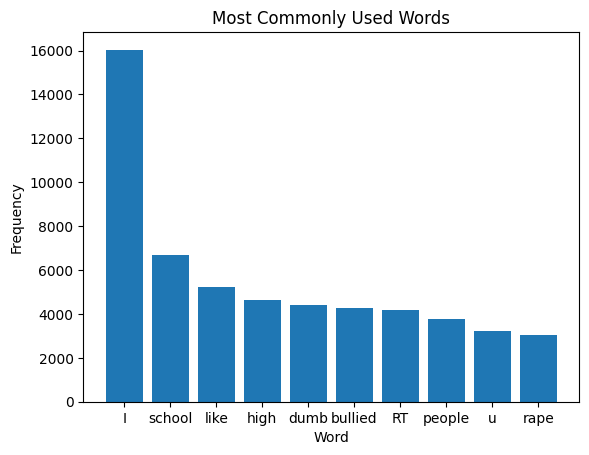

In [17]:
# Create a bar chart of the most common words
top_words = word_counts.most_common(10) # Change the number to show more/less words
x_values = [word[0] for word in top_words]
y_values = [word[1] for word in top_words]
plt.bar(x_values, y_values)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Most Commonly Used Words')
plt.show()

Reference: https://www.kaggle.com/code/sujithmandala/cyberbullying-detection-nlp